# `pandas`, `seaborn`, and `matplotlib`

As a way of familiarizing ourselves with the data that we will be visualizing, let's create some non-interactive plots with `pandas`, `seaborn`, and `matplotlib`.

### Data Importing and Wrangling Packages

Let's begin by importing the packages that we will need for importing and wrangling our data.

In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np

### SPY Close, Returns, Realized Volatility, and VIX (`pandas` line graph)

Our first data set will consist of SPY close prices, returns, realized volatility, and VIX, from 2016Q1 through 2021Q3.

In [2]:
df_spy = pdr.get_data_yahoo(['SPY', '^VIX'], start='2016-01-01', end='2021-09-30')
df_spy = df_spy.round(2)
df_spy = df_spy['Close'].reset_index()
df_spy.rename(columns={'Date':'date','SPY':'close','^VIX':'vix'}, inplace=True)
df_spy['return'] = np.log(df_spy['close'] / df_spy['close'].shift(1))
df_spy['realized_vol'] = df_spy['return'].rolling(42).std() * np.sqrt(252)
df_spy.head()

Symbols,date,close,vix,return,realized_vol
0,2016-01-04,201.02,20.70,NaN,NaN
1,2016-01-05,201.36,19.34,0.001690,NaN
2,2016-01-06,198.82,20.59,-0.012694,NaN
3,2016-01-07,194.05,24.99,-0.024284,NaN
4,2016-01-08,191.92,27.01,-0.011037,NaN


We can easily plot all four time series using `pandas` built-in plotting functionality.  

This visualization clearly demonstrates both the realized and implied leverage effect: when the market experiences losses, there is a spike in both realized and implied volatility.

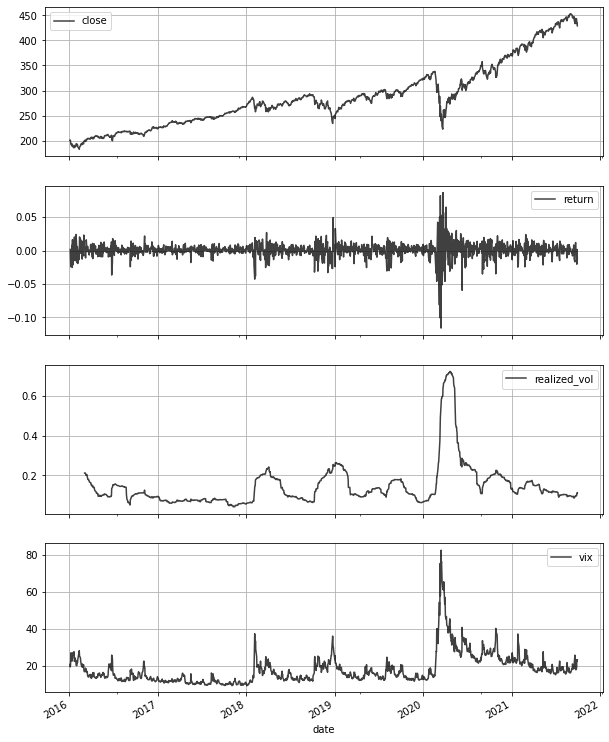

In [4]:
df_spy.plot(x='date', y=['close', 'return', 'realized_vol', 'vix',], subplots=True, style='k', grid=True, alpha=0.75, figsize=(10, 14));

### SPY Monthly Returns (`pandas` bar chart)

Next let's calculate the monthly returns for SPY.

In [5]:
df_spy['year'] = df_spy['date'].dt.year
df_spy['month'] = df_spy['date'].dt.month
df_monthly = df_spy.groupby(['year', 'month'], as_index=False)[['return']].sum()
df_monthly['year_month'] = (df_monthly['year'] * 100) + df_monthly['month']
df_monthly['year_month'] = df_monthly['year_month'].astype(str)
df_monthly.head()

Symbols,year,month,return,year_month
0,2016,1,-0.036991,201601
1,2016,2,-0.000826,201602
2,2016,3,0.059956,201603
3,2016,4,0.003933,201604
4,2016,5,0.016869,201605


Again using the `pandas` built-in plotting functionality we can easily create a bar-chart of the SPY monthly returns.

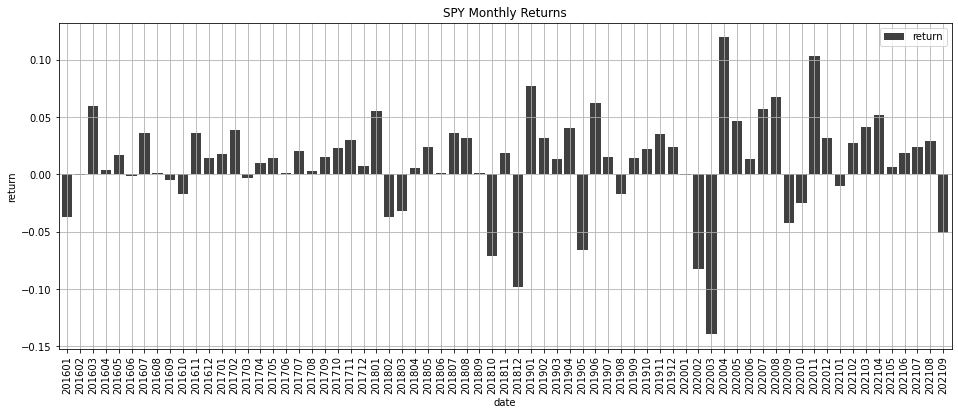

In [6]:
df_monthly.\
    plot(
        x = 'year_month',
        y = 'return',
        kind='bar',
        color='k', # color is grey
        grid=True , # adding a grid
        alpha=0.75, # translucence
        width=0.8, # increasing the width of the bars
        title='SPY Monthly Returns',
        figsize=(16, 6), # modifying the figure size
        xlabel = 'date',
        ylabel = 'return',
    );

### Implied Leverage Effect (`seaborn` scatter plot)

For our next data set, we will add a column to `df_spy` wich measures the daily change in the VIX.

In [7]:
df_spy['vix_change'] = df_spy['vix'].diff()
df_spy['vix'] = df_spy['vix'] / 100
df_spy['vix_change'] = df_spy['vix_change'] / 100
df_spy.head()

Symbols,date,close,vix,return,realized_vol,year,month,vix_change
0,2016-01-04,201.02,0.2070,NaN,NaN,2016,1,NaN
1,2016-01-05,201.36,0.1934,0.001690,NaN,2016,1,-0.0136
2,2016-01-06,198.82,0.2059,-0.012694,NaN,2016,1,0.0125
3,2016-01-07,194.05,0.2499,-0.024284,NaN,2016,1,0.0440
4,2016-01-08,191.92,0.2701,-0.011037,NaN,2016,1,0.0202


We can plot SPY daily returns against changes in the VIX to visual the implied leverage effect: when the market experiences gains, implied volatility decreases, when the market experiences losses, implied volatility increases. 

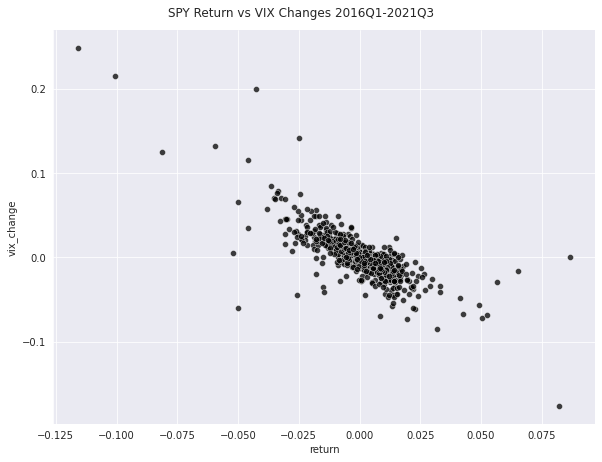

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style('darkgrid'):
    g = sns.relplot(
            x = 'return',
            y = 'vix_change',
            data = df_spy,
            color = 'black',
            alpha = 0.75,
            height = 6.5,
            aspect = 1.3,
        );
    plt.subplots_adjust(top=0.93);
    g.fig.suptitle('SPY Return vs VIX Changes 2016Q1-2021Q3');

### Asset Allocation (`matplotlib` stacked area graph)

The final data set we will look at is a hypothetical asset allocation from the beginning of 2019 through the end of 2020.

In [10]:
df_asset_allocation = pd.read_csv('asset_allocation.csv', parse_dates=['trade_date'])
df_asset_allocation.head()

,trade_date,SPY,IWM,TLT,HYG,USO,DBA,VXX
0,2019-01-01,0.040070,0.122593,0.202491,0.118022,0.158183,0.212954,0.145687
1,2019-02-01,0.148279,0.407233,0.089689,0.141022,0.054054,0.103435,0.056287
2,2019-03-01,0.055460,0.027785,0.263869,0.254802,0.040118,0.228242,0.129725
3,2019-04-01,0.070724,0.119100,0.127632,0.223241,0.083738,0.336294,0.039272
4,2019-05-01,0.237140,0.177383,0.179978,0.104329,0.082166,0.022451,0.196553


We can use `matplotlib` to create a stacked area graph to visualize how this allocation changes over time.

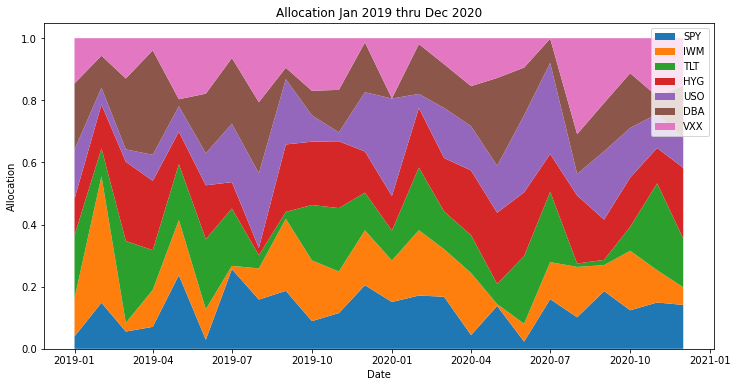

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.stackplot(df_asset_allocation['trade_date'],
              df_asset_allocation['SPY'],
              df_asset_allocation['IWM'],
              df_asset_allocation['TLT'],
              df_asset_allocation['HYG'],
              df_asset_allocation['USO'],
              df_asset_allocation['DBA'],
              df_asset_allocation['VXX'], 
              labels=['SPY','IWM','TLT','HYG','USO','DBA','VXX'])
plt.legend(loc='upper right')
plt.title("Allocation Jan 2019 thru Dec 2020")
plt.xlabel("Date")
plt.ylabel("Allocation");